## 필요한 모듈 import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image

pd.options.display.max_columns = None

## 실습을 위한 데이터셋 로드

In [2]:
from pycaret.datasets import get_data

data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


## 설정: setup()

In [3]:
from pycaret.clustering import *

s = setup(data,            
          session_id=123, 
          verbose=False)

## 모델 생성: create_model()

KMeans 알고리즘

- [K-Means Clustering 데모](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

- 군집화에서 가장 대중적으로 사용되는 알고리즘입니다. 

- **centroid라는 중점을 기준으로 가장 가까운 포인트들을 선택하는 군집화** 기법입니다.

- 뒤섞여 있는 데이터를 원하는 갯수로 군집화 합니다.

**사용되는 예제**

- 스팸 문자 분류
- 뉴스 기사 분류

In [4]:
Image(url='https://image.slidesharecdn.com/patternrecognitionbinoy-06-kmeansclustering-160317135729/95/pattern-recognition-binoy-k-means-clustering-13-638.jpg')

In [5]:
# Kmeans 알고리즘을 생성한 뒤 학습합니다.
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7207,5011.8115,0.4114,0,0,0


## 모델 학습: assign_model()

In [6]:
# 학습된 모델로 각 데이터의 클러스터를 예측합니다.
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 2
1,59,81799,0.791082,5417.661621,Cluster 2
2,62,74751,0.702657,9258.993164,Cluster 2
3,59,74373,0.765680,7346.334473,Cluster 2
4,87,17760,0.348778,16869.507812,Cluster 0
...,...,...,...,...,...
500,28,101206,0.387441,14936.775391,Cluster 1
501,93,19934,0.203140,17969.693359,Cluster 0
502,90,35297,0.355149,16091.402344,Cluster 0
503,91,20681,0.354679,18401.087891,Cluster 0


## 모델 예측결과 분석

Elbow Plot을 분석하는 방법은 다음과 같습니다.

- **그래프에서 경향성 파악** : Elbow Plot을 살펴보면 클러스터 개수가 증가할수록 WCSS 값이 감소하는 것을 볼 수 있습니다. 그러나 그래프 상에서 어디까지 클러스터의 개수를 늘리는 것이 좋은지 판단하기 위해서는 그래프에서 "굽이"가 어디에 있는지 파악해야 합니다.

- **굽이 파악** : 굽이가 어디에 있는지 파악하는 것이 Elbow Plot을 해석하는 핵심입니다. 그래프에서 굽이를 찾으면, 그 지점 이후로 클러스터의 개수를 늘려도 WCSS 값의 감소가 크게 일어나지 않는 것을 의미합니다. 따라서, 굽이가 있는 지점이 최적의 클러스터 개수라고 판단할 수 있습니다.

- **최적의 클러스터 개수 결정** : 굽이를 찾은 후, 그 지점을 기준으로 최적의 클러스터 개수를 결정할 수 있습니다. 굽이의 위치가 명확하지 않을 경우, 여러 가지 클러스터 개수에 대해 K-Means 알고리즘을 실행한 후, 각각의 WCSS 값을 비교하여 최적의 클러스터 개수를 결정할 수도 있습니다.

따라서, Elbow Plot을 사용하여 최적의 클러스터 개수를 결정하는 방법은 굽이를 찾는 것입니다. 굽이의 위치를 파악하고, 그 지점을 기준으로 최적의 클러스터 개수를 결정하면 됩니다.

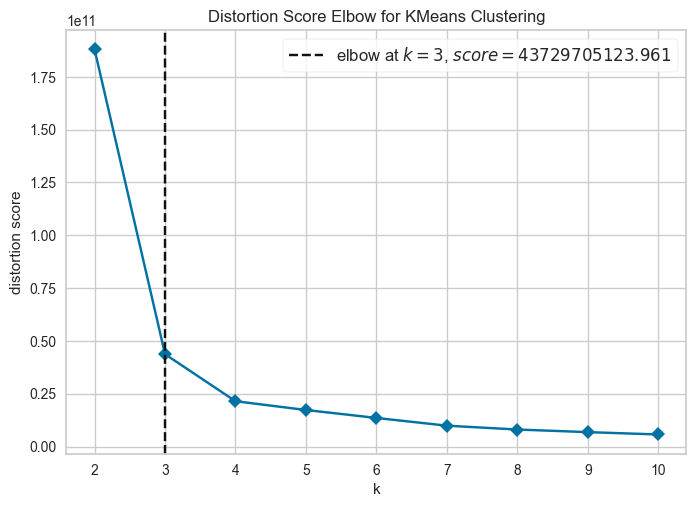

In [7]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

In [8]:
# 이전에 찾은 Elbow 값을 적용한 뒤 결과를 확인합니다 (실루엣 계수)
# 실루엣 계수는 클러스터의 품질을 평가하기 위하여 활용합니다.
kmeans = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7393,3567.5370,0.3435,0,0,0


## 예측: predict_model()

In [9]:
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,Age,Income,SpendingScore,Savings,Cluster
0,58.0,77769.0,0.791329,6559.829923,Cluster 2
1,59.0,81799.0,0.791082,5417.661426,Cluster 2
2,62.0,74751.0,0.702657,9258.992965,Cluster 2
3,59.0,74373.0,0.765680,7346.334504,Cluster 2
4,87.0,17760.0,0.348778,16869.507130,Cluster 0
...,...,...,...,...,...
500,28.0,101206.0,0.387441,14936.775389,Cluster 1
501,93.0,19934.0,0.203140,17969.693769,Cluster 0
502,90.0,35297.0,0.355149,16091.401954,Cluster 0
503,91.0,20681.0,0.354679,18401.088445,Cluster 0


최종 군집 결과를 확인하고 출력 합니다.

In [10]:
kmeans_pred['Cluster'].value_counts()

Cluster 1    199
Cluster 2    159
Cluster 0    147
Name: Cluster, dtype: int64

## 저장 / 로드

In [11]:
# save model
save_model(kmeans, 'clustring-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=3, random_state=123))]),
 'clustring-model.pkl')

In [12]:
# load model
cludster_model = load_model('clustring-model')
cludster_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Age', 'Income', 'SpendingScore',
                                             'Savings'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=3, random_state=123))])